# Import Used Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from matplotlib import pyplot as plt 

# Reading Dataset from CSV

In [2]:
Dataset = pd.read_csv(r"C:\Users\Mostafa Elgendy\PycharmProjects\Logistic Regression\customer_data.csv") #Official Dataset

# copy of DataSet
Dataset_copy=Dataset.copy()

# Getting Info About Data

In [3]:
# shows all Data of the Dateset
Dataset_copy

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1
...,...,...,...
395,27,96000,1
396,23,63000,0
397,48,33000,1
398,48,90000,1


In [4]:
# Showing the Head of Dataset what does it contains and sample of data
Dataset_copy.head() 

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


In [5]:
## 400 Records without any NULL Value
Dataset_copy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        400 non-null    int64
 1   salary     400 non-null    int64
 2   purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
# Getting Numerical Statistical Measures
Dataset_copy.describe().round()

,age,salary,purchased
count,400.0,400.0,400.0
mean,38.0,69742.0,0.0
std,10.0,34097.0,0.0
min,18.0,15000.0,0.0
25%,30.0,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


# Minimax Scaler

In [7]:
Dataset_copy["age"]=(Dataset_copy["age"]-np.min(Dataset_copy["age"]))/(np.max(Dataset_copy["age"])-np.min(Dataset_copy["age"]))

Dataset_copy["salary"]=(Dataset_copy["salary"]-np.min(Dataset_copy["salary"]))/(np.max(Dataset_copy["salary"])-np.min(Dataset_copy["salary"]))


In [8]:
# Showing Sample Data After Scalling
Dataset_copy.head()   

,age,salary,purchased
0,0.619048,0.177778,0
1,0.333333,0.777778,1
2,0.476190,0.259259,0
3,0.333333,0.888889,1
4,0.809524,0.044444,1


# Shuffle and Splitting the Dataset

In [9]:
# the Training X features
x = Dataset_copy[["age","salary"]].values

# actual Output Value
y= Dataset_copy["purchased"].values       

In [10]:
#Shuffle Dataset and split
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2, random_state=1,shuffle=True)

In [11]:
#show Dataset Shuffled
Dataset_copy.head()

,age,salary,purchased
0,0.619048,0.177778,0
1,0.333333,0.777778,1
2,0.476190,0.259259,0
3,0.333333,0.888889,1
4,0.809524,0.044444,1


# Machine Learning Model " Logistic Regression"

## Split Dataset to Training, Testing

In [12]:
# See shape of Splitting Data

print(x_Train.shape)
print(x_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


## Logistic Regression Class Implementation

In [13]:
class LogisticRegression:
    
    Learning_rate=0
    num_Iterations=0
    weights=None    # Theta 1 ,2,3,.....
    bias = None     # Theta 0
    all_Cost=[]
    
    def __init__(self,Lrate,Iterations):
        self.Learning_rate=Lrate
        self.num_Iterations=Iterations
        self.all_Cost=[]
        
    def Sigmoid_Function(self,x):
        return 1/(1+np.exp(-x))
    
    def fit_Data_with_Model(self,x_Train,y_Train): # Define THetas
        
        Num_Of_Features= x_Train.shape[1]
        
        self.weights=np.zeros(Num_Of_Features)
        
        self.bias=0
        
        for i in range(self.num_Iterations):
            #Linear Model to change to Sigmoid
            Linear_Equation = np.dot(x_Train,self.weights) + self.bias #y=ax+b
            
            #Use Sigmoid Function to fit Data and find the optimal Line Predicted for Data
            non_linear_fit_Prediction = self.Sigmoid_Function(Linear_Equation)
            
            # Partial Derivative of Weight
            Diff_weight = (1/x_Train.shape[0]) * np.dot(x_Train.T , (non_linear_fit_Prediction-y_Train))    
                                                    #2*320                 320*1
            # Partial Derivative of bias
            Diff_bias= (1/x_Train.shape[0]) * np.sum(non_linear_fit_Prediction-y_Train)
            
            #getting New Weights for THETAS
            self.weights= self.weights - (self.Learning_rate * Diff_weight)   
            
            #getting New Weights for BIAS
            self.bias= self.bias - (self.Learning_rate * Diff_bias)

            #getting Cost
            self.all_Cost.append(np.sum(abs(non_linear_fit_Prediction-y_Train)))
            
    def Predict(self,x_Test): # this function predicts the Y from Test Data
        Linear_Equation= np.dot(x_Test,self.weights) + self.bias
        y_Predicted_Test= self.Sigmoid_Function(Linear_Equation)   #80*1

        List_of_YPredicted=[]
        for y in y_Predicted_Test:
            if y<=0.5:
                List_of_YPredicted.append(0)
            else:
                List_of_YPredicted.append(1)
        return List_of_YPredicted
    
    
    def AccuracyRate(self,y_predict,y_T):
        if y_predict!=None:
            rightPredictions= np.sum(y_predict==y_T)
        return rightPredictions/len(y_T)*100

# Running the Model

## Test Case #1

In [14]:
Model_1=LogisticRegression(0.007,8000)            

Model_1.fit_Data_with_Model(x_Train,y_Train)

y_predict=Model_1.Predict(x_Test)

accuracy=Model_1.AccuracyRate(y_predict,y_Test)

print("Accuracy = ",accuracy.round(),"%")

Accuracy =  80.0 %


#### Visualize Learnable Parameters Test Case #1

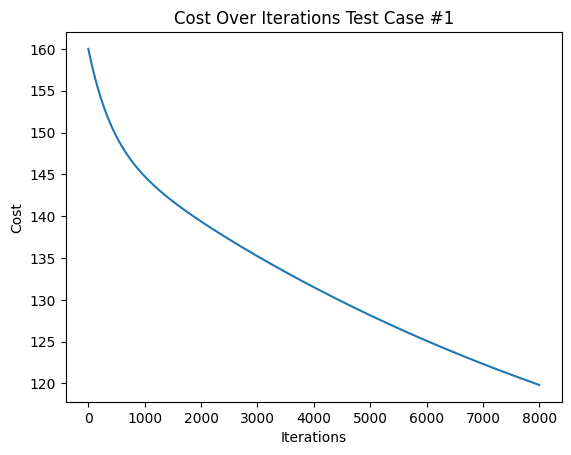

In [15]:
#plt.scatter(x_Train, y_Train,color='g') 
plt.plot(Model_1.all_Cost)
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Cost Over Iterations Test Case #1')
plt.show();

## Test Case #2

In [16]:
Model_2=LogisticRegression(0.01,8000)            

Model_2.fit_Data_with_Model(x_Train,y_Train)

y_predict=Model_2.Predict(x_Test)

accuracy=Model_2.AccuracyRate(y_predict,y_Test)

print("Accuracy = ",accuracy.round(),"%")

Accuracy =  84.0 %


#### Visualize Learnable Parameters Test Case #2

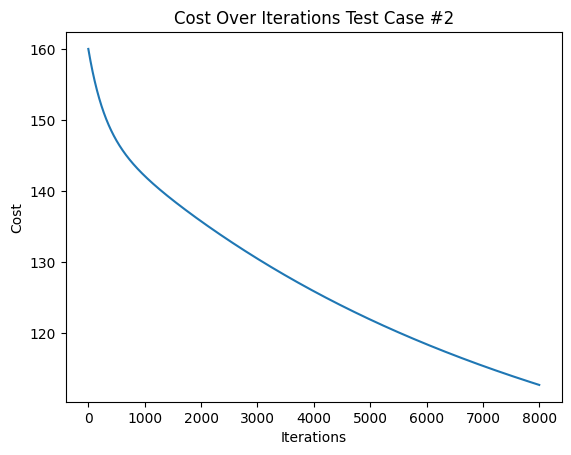

In [17]:
plt.clf()
plt.plot(Model_2.all_Cost)
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Cost Over Iterations Test Case #2')
plt.show();

## Test Case #3

In [18]:
Model_3=LogisticRegression(0.05,8000)            

Model_3.fit_Data_with_Model(x_Train,y_Train)

y_predict=Model_3.Predict(x_Test)

accuracy=Model_3.AccuracyRate(y_predict,y_Test)

print("Accuracy = ",accuracy.round(),"%")

Accuracy =  89.0 %


#### Visualize Learnable Parameters Test Case #3

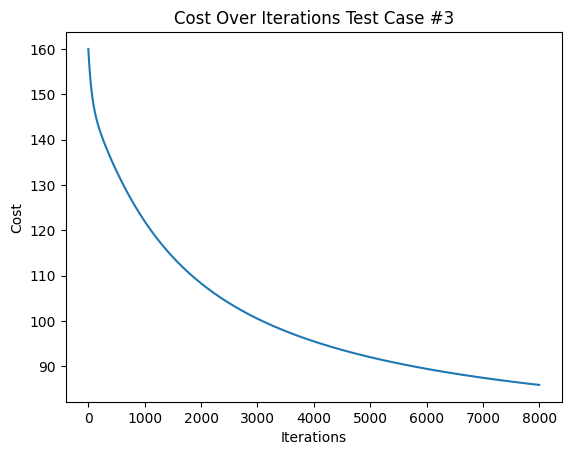

In [19]:
plt.clf()
plt.plot(Model_3.all_Cost)
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Cost Over Iterations Test Case #3')
plt.show();

## Test Case #4 

In [20]:
Model_4=LogisticRegression(0.1,8000)            

Model_4.fit_Data_with_Model(x_Train,y_Train)

y_predict=Model_4.Predict(x_Test)

accuracy=Model_4.AccuracyRate(y_predict,y_Test)

print("Accuracy = ",accuracy.round(),"%")

Accuracy =  91.0 %


#### Visualize Learnable Parameters Test Case #4

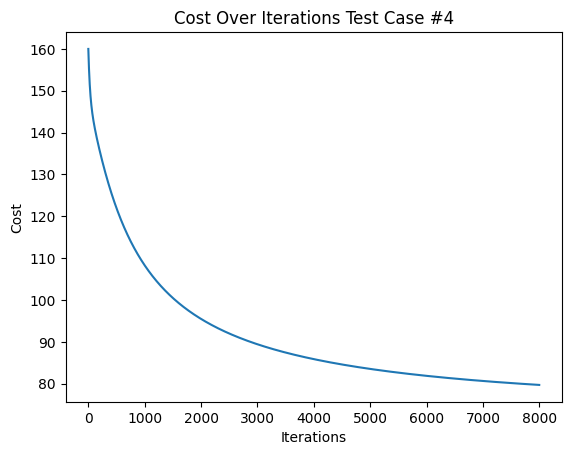

In [21]:
plt.clf()
plt.plot(Model_4.all_Cost)
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Cost Over Iterations Test Case #4')
plt.show();

## Test Case #5

In [22]:
Model_5=LogisticRegression(0.3,8000)            

Model_5.fit_Data_with_Model(x_Train,y_Train)

y_predict=Model_5.Predict(x_Test)

accuracy=Model_5.AccuracyRate(y_predict,y_Test)

print("Accuracy = ",accuracy.round(),"%")

Accuracy =  91.0 %


#### Visualize Learnable Parameters Test Case #5

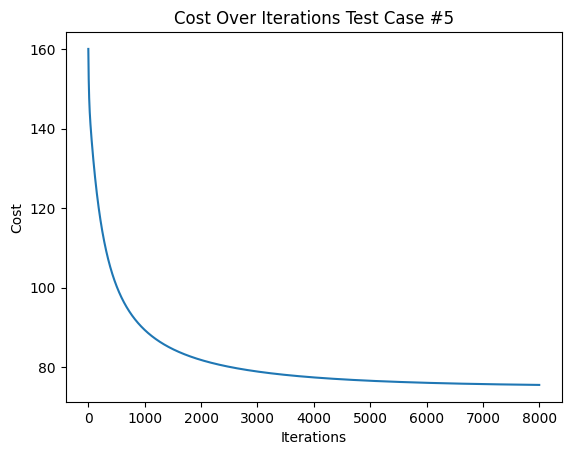

In [23]:
#plt.scatter(x_Train, y_Train,color='g') 
plt.plot(Model_5.all_Cost)
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Cost Over Iterations Test Case #5')
plt.show();

# Sample For Predicted and Actual Data

In [24]:
predicted_actual = [y_predict,y_Test]
dataframe = pd.DataFrame(predicted_actual,["y_pred","y_test"]).T
dataframe[-20:-1]

,y_pred,y_test
60,0,0
61,0,1
62,1,1
63,1,1
64,1,1
65,0,0
66,1,1
67,0,0
68,1,1
69,0,0


# Learnable Parameters Values

In [25]:
#Seeing Bias and weight Values

print("Bias: ",Model_4.bias)
print("W1: ",Model_4.weights[0])
print("W2: ",Model_4.weights[1])

Bias:  -6.267273707021508
W1:  7.721979316324239
W2:  4.0290093789041705
